In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
data = pd.read_csv('booking.csv')

In [27]:
data

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [28]:
data = data.drop(['Booking_ID', 'type of meal', 'room type', 'date of reservation'], axis = 1)

In [29]:
data

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,0,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,0,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,0,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,0,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,0,48,Online,0,0,0,77.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,0,346,Online,0,0,0,115.00,1,Canceled
36281,2,0,1,3,0,34,Online,0,0,0,107.55,1,Not_Canceled
36282,2,0,1,3,0,83,Online,0,0,0,105.61,1,Not_Canceled
36283,3,0,0,4,0,121,Offline,0,0,0,96.90,1,Not_Canceled


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   car parking space         36285 non-null  int64  
 5   lead time                 36285 non-null  int64  
 6   market segment type       36285 non-null  object 
 7   repeated                  36285 non-null  int64  
 8   P-C                       36285 non-null  int64  
 9   P-not-C                   36285 non-null  int64  
 10  average price             36285 non-null  float64
 11  special requests          36285 non-null  int64  
 12  booking status            36285 non-null  object 
dtypes: float64(1), int64(10), object(2)
memory usage: 3.6+ MB


In [31]:
data['market segment type'].describe()

count      36285
unique         5
top       Online
freq       23221
Name: market segment type, dtype: object

In [32]:
def market(n):
    if n =='Online':
        return 0
    elif n =='Offline':
        return 1
    elif n =='Complementary':
        return 2
    elif n=='Corporate':
        return 3
    else:
        return 4

In [33]:
data['market segment type']=data['market segment type'].apply(market)

In [34]:
data

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,0,224,1,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,0,5,0,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,0,1,0,0,0,0,50.00,0,Canceled
3,1,0,0,2,0,211,0,0,0,0,100.00,1,Canceled
4,1,0,1,2,0,48,0,0,0,0,77.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,0,346,0,0,0,0,115.00,1,Canceled
36281,2,0,1,3,0,34,0,0,0,0,107.55,1,Not_Canceled
36282,2,0,1,3,0,83,0,0,0,0,105.61,1,Not_Canceled
36283,3,0,0,4,0,121,1,0,0,0,96.90,1,Not_Canceled


In [35]:
data['booking status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [36]:
def ress(n):
    if n=='Not_Canceled':
        return 0
    elif n=='Canceled':
        return 1
  
    

In [37]:
data['booking status'] = data['booking status'].apply(ress)

In [38]:
data

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,0,224,1,0,0,0,88.00,0,0
1,1,0,1,3,0,5,0,0,0,0,106.68,1,0
2,2,1,1,3,0,1,0,0,0,0,50.00,0,1
3,1,0,0,2,0,211,0,0,0,0,100.00,1,1
4,1,0,1,2,0,48,0,0,0,0,77.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,0,346,0,0,0,0,115.00,1,1
36281,2,0,1,3,0,34,0,0,0,0,107.55,1,0
36282,2,0,1,3,0,83,0,0,0,0,105.61,1,0
36283,3,0,0,4,0,121,1,0,0,0,96.90,1,0


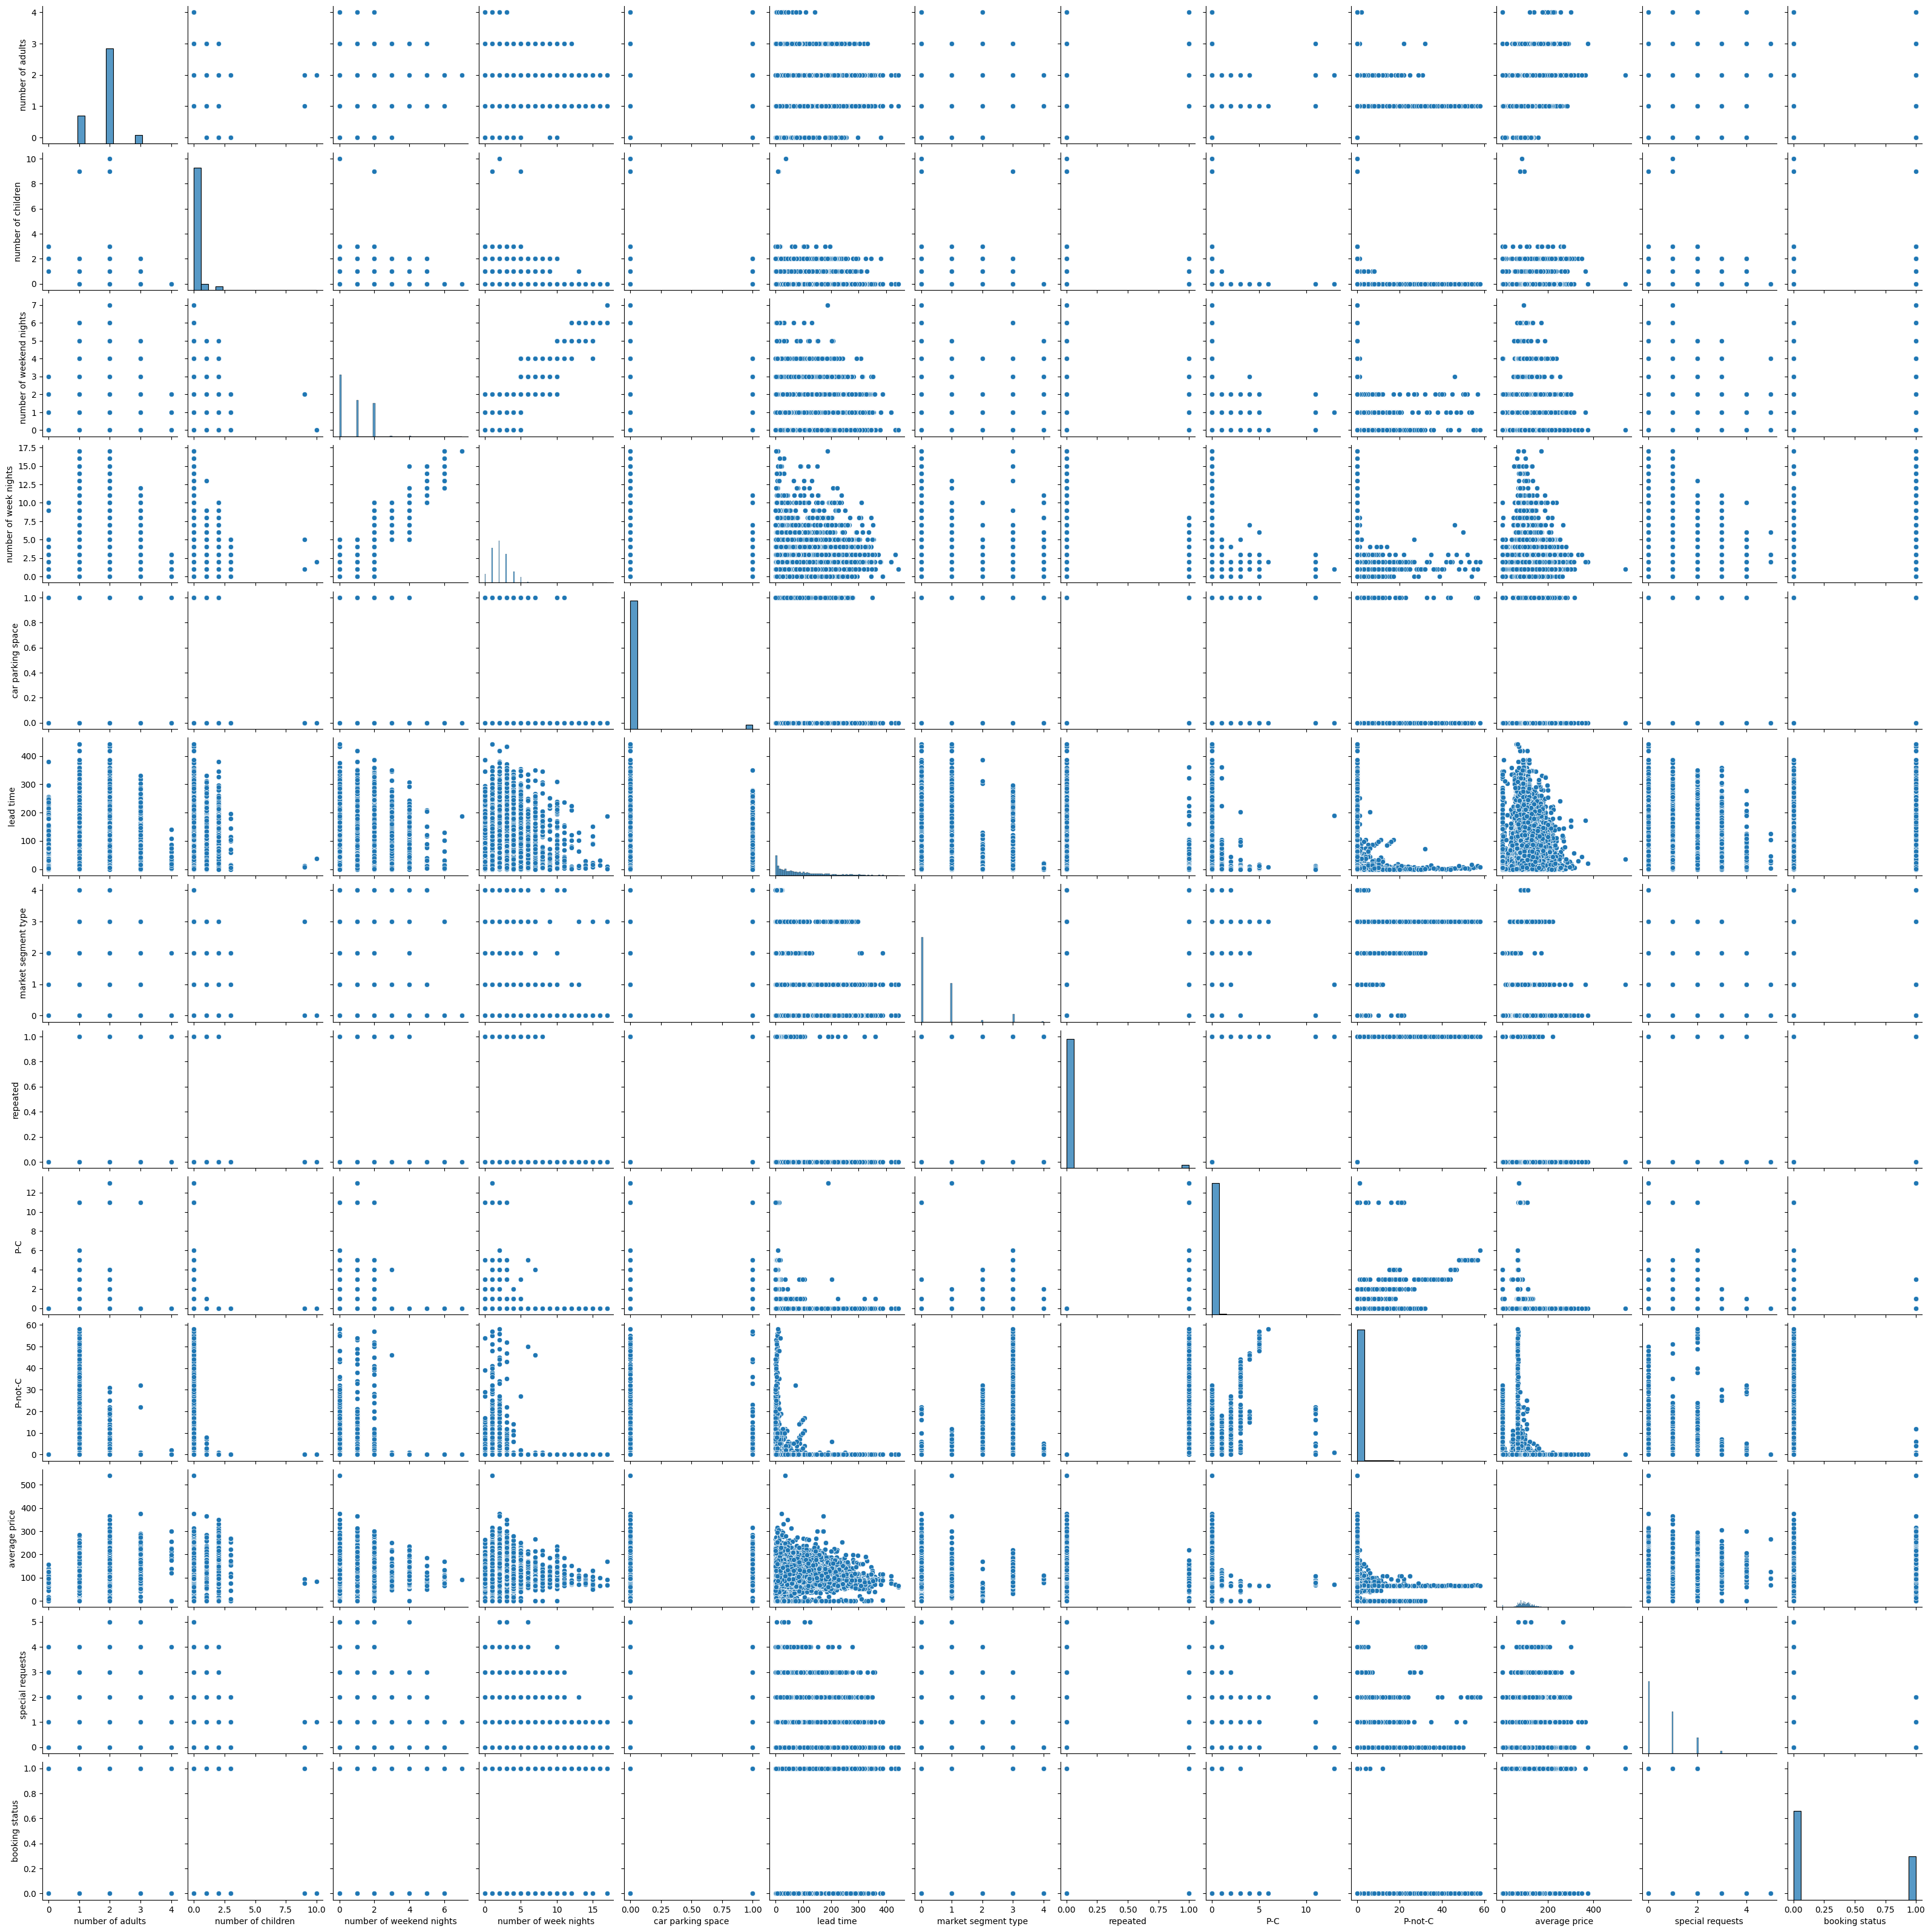

In [39]:
sns.pairplot(data = data, )

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(data.drop('booking status', axis=1))

StandardScaler()

In [43]:
scaledFeatures = scaler.transform(data.drop('booking status', axis=1))

In [44]:
data_feat = pd.DataFrame(scaledFeatures, columns=data.columns[:-1])
data_feat.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests
0,-1.628431,2.221609,1.366111,1.981250,-0.178794,1.614661,0.631465,-0.162187,-0.063385,-0.087444,-0.439538,-0.788212
1,-1.628431,-0.261636,0.217450,0.563741,-0.178794,-0.933699,-0.612371,-0.162187,-0.063385,-0.087444,0.092868,0.483646
2,0.299073,2.221609,0.217450,0.563741,-0.178794,-0.980244,-0.612371,-0.162187,-0.063385,-0.087444,-1.522592,-0.788212
3,-1.628431,-0.261636,-0.931212,-0.145013,-0.178794,1.463389,-0.612371,-0.162187,-0.063385,-0.087444,-0.097521,0.483646
4,-1.628431,-0.261636,0.217450,-0.145013,-0.178794,-0.433336,-0.612371,-0.162187,-0.063385,-0.087444,-0.753054,-0.788212


In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(scaledFeatures,data['booking status'],
                                                    test_size=0.30)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=15)

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [63]:
pred =knn.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7292
           1       0.80      0.70      0.75      3594

    accuracy                           0.85     10886
   macro avg       0.83      0.81      0.82     10886
weighted avg       0.84      0.85      0.84     10886



In [66]:
print(confusion_matrix(y_test, pred))

[[6676  616]
 [1067 2527]]
